# Bostrom supply simulation
---

In [1]:
import time
import itertools

# Standard libraries: https://docs.python.org/3/library/
import math

# Analysis and plotting modules
import pandas as pd

# cadCAD configuration modules
from cadCAD.configuration.utils import config_sim
from cadCAD.configuration import Experiment

# cadCAD simulation engine modules
from cadCAD.engine import ExecutionMode, ExecutionContext
from cadCAD.engine import Executor

from collections import Counter
from cadCAD import configs

# custom functions modules

from utils.psub import partial_state_update_blocks

from utils.plots import linear_plot, scatter_plot, df_preparator

## Initial state

In [2]:
sim_period = 10           # amount of years for simulating
timesteps_per_year = 365        # units per year(days`

In [3]:
initial_state = {
    'boot_inflation': 0.10,
    'boot_supply': 1_000_000_000_000_000,
    'liquid_boot_amount': 200_000_000_000_000,
    'frozen_boot_amount': 700_000_000_000_000,
    'bonded_boot_amount': 100_000_000_000_000,
    'claimed_boot_amount': 0,
    'to_distribution_boot_amount':0,
    'agents_count': 10000,
    'capitalization_per_agent': 1,
    'capitalization': 10000 * 1,
    'validator_revenue': 0,
    'timestep_provision': 0,
    'gboot_price': 0,
    'cyberlinks': 0,
    'minted_amper_amount': 0,
    'minted_volt_amount': 0,
    'investmint_max_period': math.floor(timesteps_per_year / 4),
    'mint_rate_amper': 1,
    'mint_rate_volt': 1,
    'agents_count': 250,
    'gpu_memory_usage': 0,
    'amper_volt_ratio': 0
}

## Params for simulating

In [4]:
# vesting_speed = [3, 6, 12, 18, 24, 30, 36]
# unvesting_speed = [72, 60, 48, 36, 30, 24]

# parameter_sweep = list(itertools.product(vesting_speed, unvesting_speed))

# vesting_speed = [x[0] for x in parameter_sweep]
# unvesting_speed = [x[1] for x in parameter_sweep]

In [5]:
system_params = {
    # timesteps params
    'timesteps_per_year': [timesteps_per_year], # units per year(minutes)
    
    # boot inflation params
    'boot_inflation_rate_change_annual': [0.07], # maximum inflation rate change per year
    'boot_inflation_min': [0.05], # minimum percent of the inflation
    'boot_inflation_max': [0.20], # maximum percent of the inflation
    'boot_bonded_share_target': [0.70], # desireable ratio between vested tokens and tokens supply
    
    # boot bonding amount params
    'boot_bonding_share': [0.70],
    
    # gift claim dynamics params
    'days_for_gift_activation': [30],
    'claimed_at_activation_share': [0.85],
    'days_for_gift_full_claim': [150],
    'boot_gift_amount_init': [700_000_000_000_000],
    'liquid_boot_supply_share': [0.25], # this param isn't used
    
    # understanding network effects params
    'agents_count_at_activation': [10_000],
    'start_capitalization_per_agent': [1],
    'capitalization_per_agent': [1],
    
    # predicting volts demand params
    'extra_links': [0],
    'guaranted_links': [0],
    
    # amper and volt minting params
    'base_halving_period_amper': [365],
    'base_halving_period_volt': [365],
    'mint_rate_amper_init': [1], # initial mint rate for Amperes
    'mint_rate_volt_init': [1], # initial mint rate for Voltes
    'base_investmint_amount_amper': [100_000_000], # initial cost for resource token in 1 cycle
    'base_investmint_amount_volt': [100_000_000], # initial cost for resource token in 1 cycle
    'base_investmint_period_amper': [math.floor(timesteps_per_year / 12)], # 1 month
    'base_investmint_period_volt': [math.floor(timesteps_per_year / 12)], # 1 month
    'investmint_max_period_init': [math.floor(timesteps_per_year / 4)],
    'horizont_initial_period': [math.floor(timesteps_per_year / 4)], # 3 months
    
    # Investments into infrastructure params
    'validator_commission': [0.1],
    'max_validator_count': [92],
}

In [6]:
del configs[:]
experiment = Experiment()

sim_config = config_sim({
    'N': 1,
    'T': range(int(math.ceil(sim_period * timesteps_per_year))),
    'M': system_params
})

experiment.append_configs(
    initial_state = initial_state,
    partial_state_update_blocks = partial_state_update_blocks,
    sim_configs = sim_config
)

In [7]:
exec_context = ExecutionContext()

simulation = Executor(exec_context=exec_context, configs=configs)
raw_result, tensor_field, sessions = simulation.execute()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (3650, 28, 1, 21)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.47s


In [8]:
start_time = time.time()
simulation_result = pd.DataFrame(raw_result)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.03266406059265137 seconds ---


In [9]:
start_time = time.time()

In [10]:
df = simulation_result.copy()
# df['boot_supply'] = df['liquid_boot'] + df['frozen_boot'] + df['vested_boot']
# df['cap_in_eth'] = df['capitalization_per_agent'] * df['agents_count']
# df

In [11]:
# save local model file for power bi
# import pyarrow as pa
# import pyarrow.parquet as pq
# table = pa.Table.from_pandas(df)
# pq.write_table(table, 'simulation.parquet')

In [12]:
plot_df = df_preparator(df)

In [13]:
plot_df

,boot_inflation,boot_supply,liquid_boot_amount,frozen_boot_amount,bonded_boot_amount,claimed_boot_amount,to_distribution_boot_amount,agents_count,capitalization_per_agent,capitalization,...,investmint_max_period,mint_rate_amper,mint_rate_volt,gpu_memory_usage,amper_volt_ratio,simulation,subset,run,substep,timestep
0,0.100000,1000000000000000,2.000000e+14,7.000000e+14,100000000000000,0.000000e+00,0.000000e+00,250,1.000000,1.000000e+04,...,91.000000,1.00,1.00,0.000000e+00,0.0,0,0,1,0,0
1,0.100164,1000273972602739,6.027397e+13,7.000000e+14,239999999999999,1.983333e+13,1.983333e+13,350,0.962966,2.500000e+02,...,1.421875,1.00,1.00,0.000000e+00,0.0,0,0,1,1,1
2,0.100290,1000548470755776,1.835669e+13,7.000000e+14,282191780821917,3.966667e+13,3.966667e+13,468,0.942064,3.370381e+02,...,2.843750,1.00,1.00,8.493389e+07,1.0,0,0,1,1,2
3,0.100405,1000823389756696,5.781926e+12,7.000000e+14,295041463775618,5.950000e+13,5.950000e+13,604,0.929309,4.408861e+02,...,5.687500,1.00,1.00,8.533443e+07,1.0,0,0,1,1,3
4,0.100516,1001098698282046,2.009886e+12,7.000000e+14,299088811962372,7.933333e+13,7.933333e+13,758,0.921043,5.613028e+02,...,5.687500,1.00,1.00,8.557872e+07,1.0,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,0.050000,1750502010549963,1.342497e+12,0.000000e+00,4149226180247242,7.000000e+14,7.000000e+12,119971880,0.896420,1.074863e+08,...,5824.000000,0.01,0.01,3.906136e+09,1.0,0,0,1,1,3646
3647,0.050000,1750741805345928,1.342544e+12,0.000000e+00,4150165928125814,7.000000e+14,7.000000e+12,120037608,0.896420,1.075452e+08,...,5824.000000,0.01,0.01,3.906529e+09,1.0,0,0,1,1,3647
3648,0.050000,1750981632990495,1.342591e+12,0.000000e+00,4151105708846561,7.000000e+14,7.000000e+12,120103354,0.896420,1.076041e+08,...,5824.000000,0.01,0.01,3.906923e+09,1.0,0,0,1,1,3648
3649,0.050000,1751221493488164,1.342638e+12,0.000000e+00,4152045522413982,7.000000e+14,7.000000e+12,120169118,0.896420,1.076630e+08,...,5824.000000,0.01,0.01,3.907316e+09,1.0,0,0,1,1,3649


## Inflation

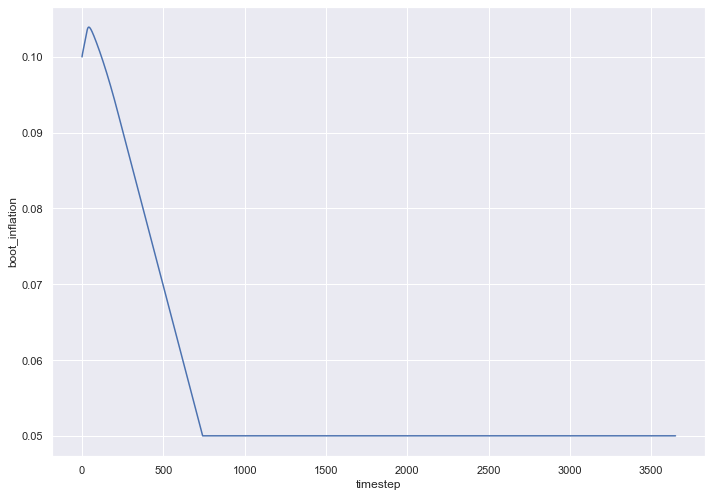

In [14]:
linear_plot(plot_df, "boot_inflation", render='sns')

## Supply

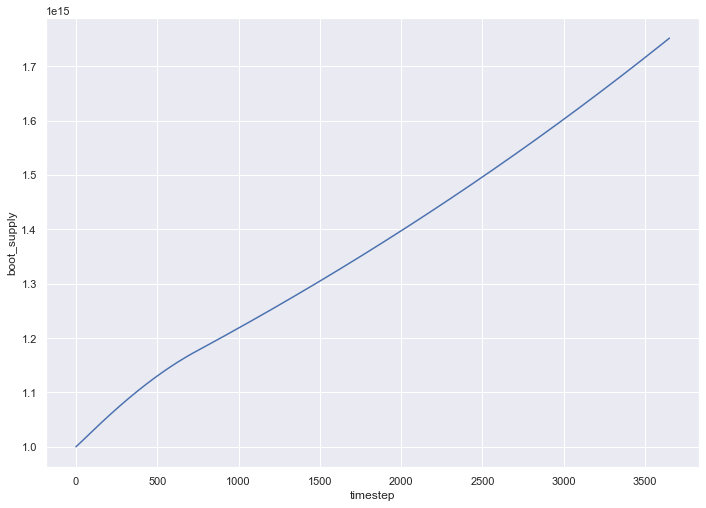

In [15]:
linear_plot(plot_df, 'boot_supply', render='sns')

## Bonded

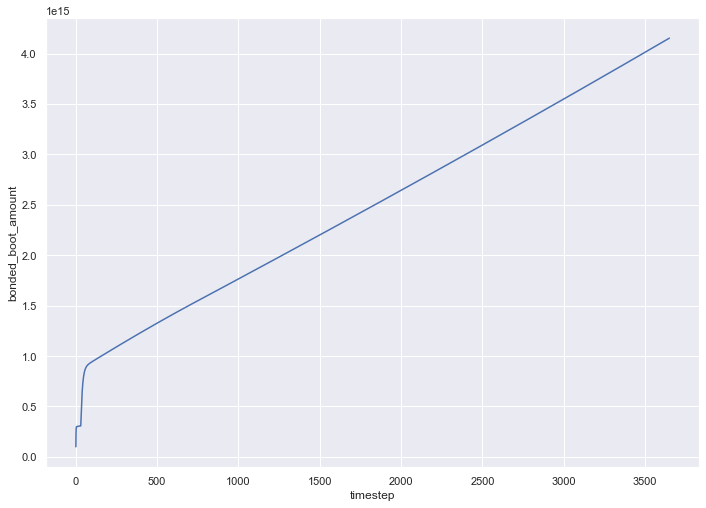

In [16]:
linear_plot(plot_df, 'bonded_boot_amount', render='sns')

## provision

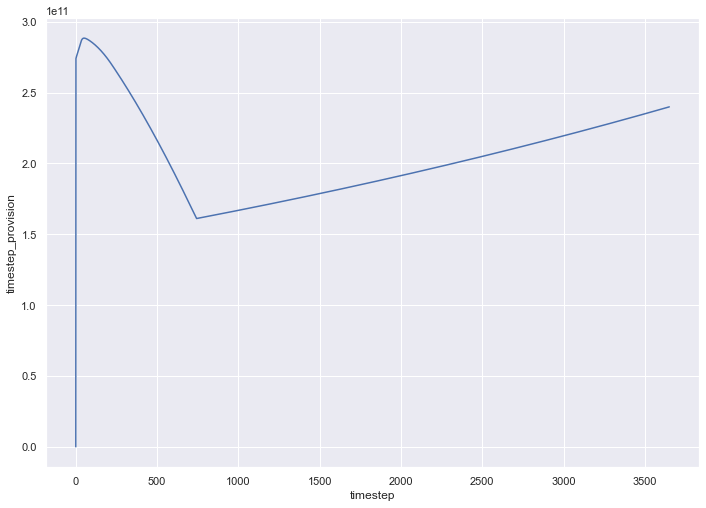

In [17]:
linear_plot(plot_df, 'timestep_provision', render='sns')

## claimed_boot_amount

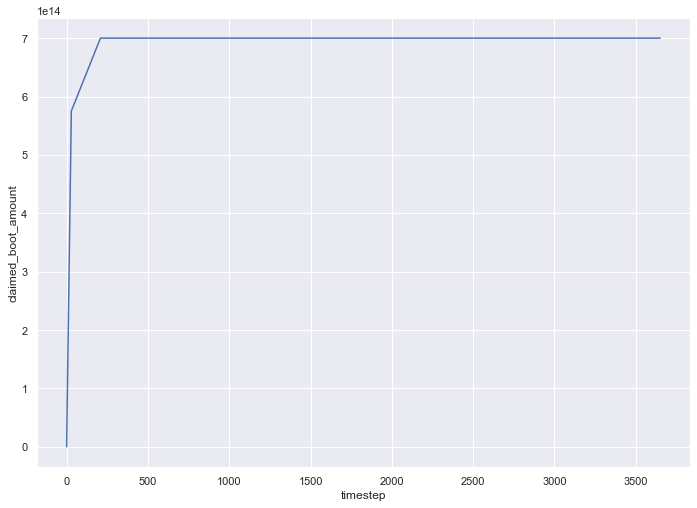

In [18]:
linear_plot(plot_df, 'claimed_boot_amount', render='sns')

## frozen_boot_amount

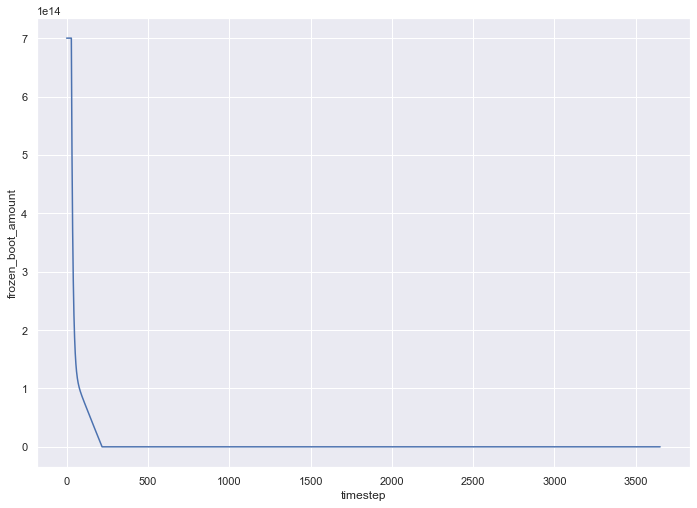

In [19]:
linear_plot(plot_df, 'frozen_boot_amount', render='sns')

## liquid_boot_amount

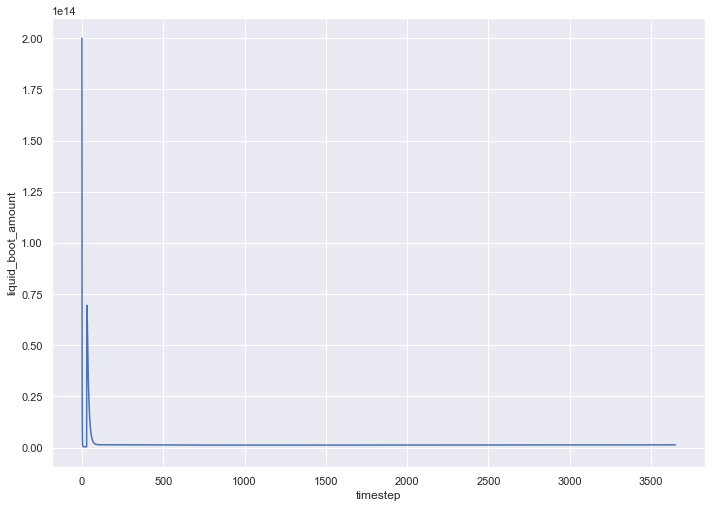

In [20]:
linear_plot(plot_df, 'liquid_boot_amount', render='sns')

In [21]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 2.829296112060547 seconds ---


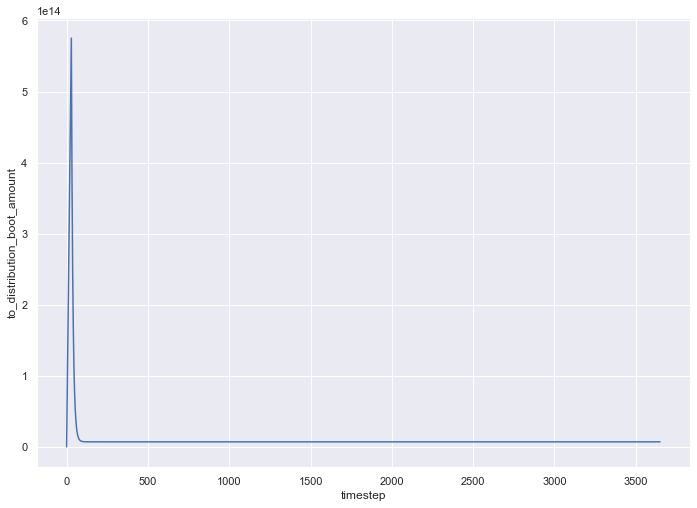

In [22]:
linear_plot(plot_df, 'to_distribution_boot_amount', render='sns')

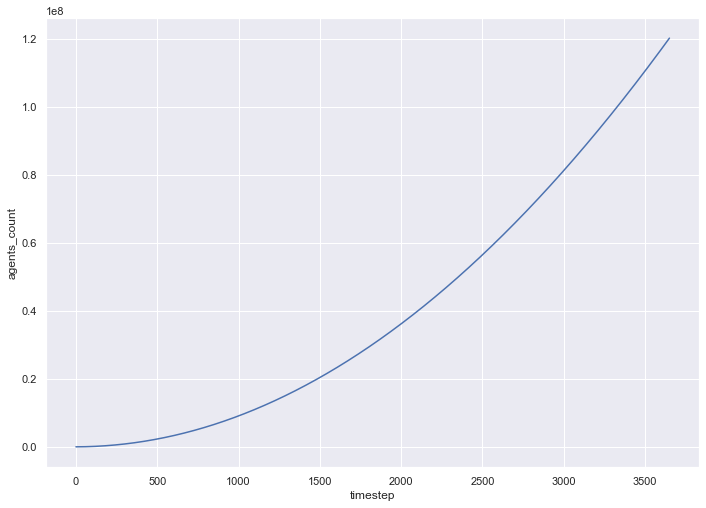

In [23]:
linear_plot(plot_df, 'agents_count', render='sns')

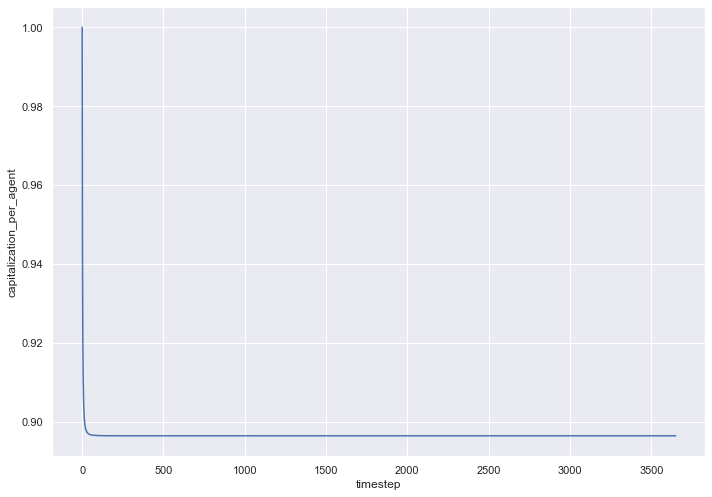

In [24]:
linear_plot(plot_df, 'capitalization_per_agent', render='sns')

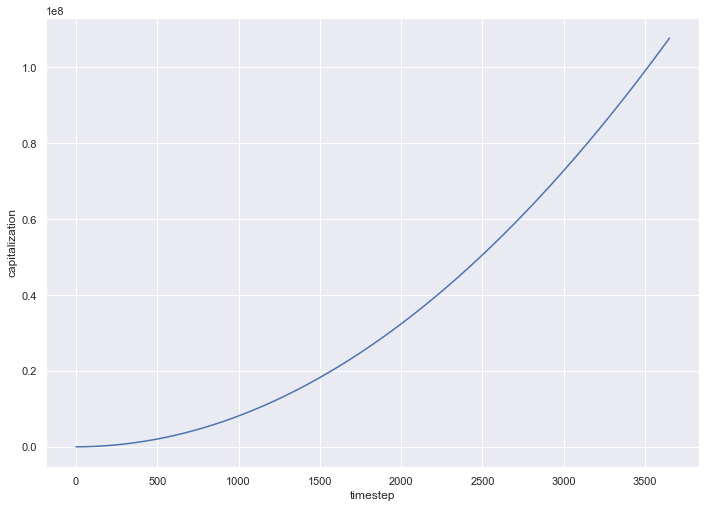

In [25]:
linear_plot(plot_df, 'capitalization', render='sns')

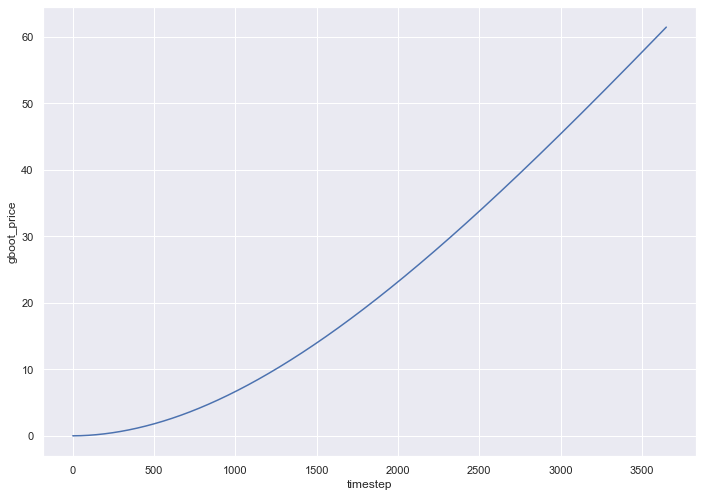

In [26]:
linear_plot(plot_df, 'gboot_price', render='sns')

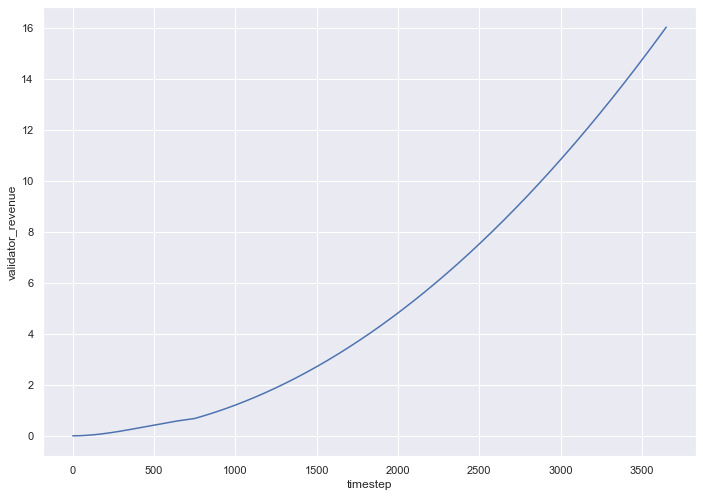

In [27]:
linear_plot(plot_df, 'validator_revenue', render='sns')

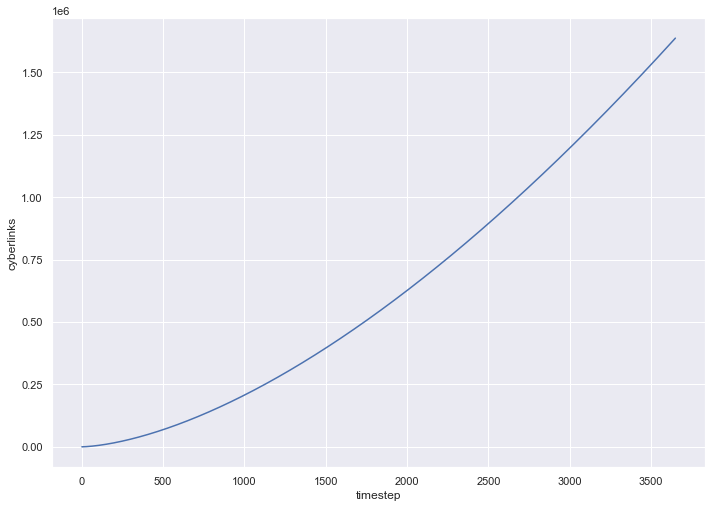

In [28]:
linear_plot(plot_df, 'cyberlinks', render='sns')

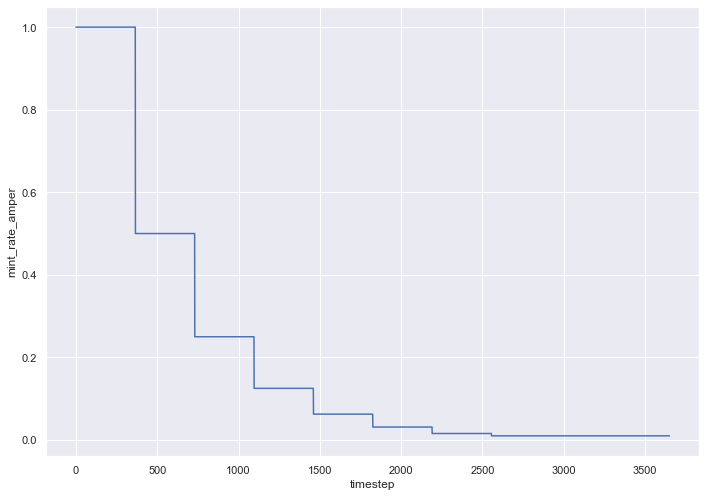

In [29]:
linear_plot(plot_df, 'mint_rate_amper', render='sns')

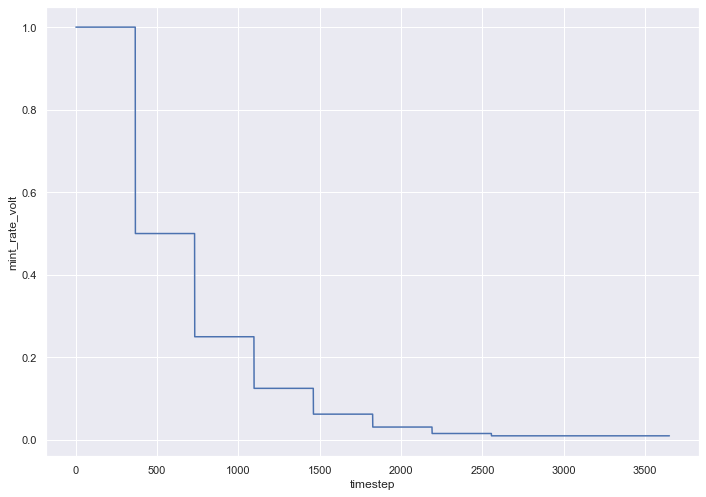

In [30]:
linear_plot(plot_df, 'mint_rate_volt', render='sns')

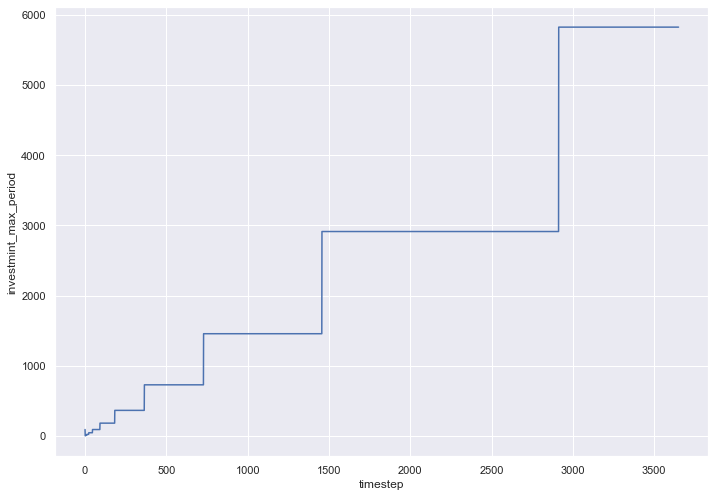

In [31]:
linear_plot(plot_df, 'investmint_max_period', render='sns')

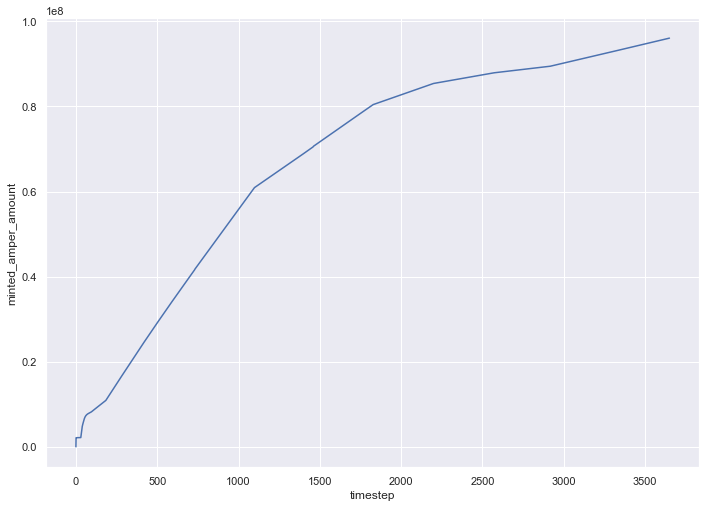

In [32]:
linear_plot(plot_df, 'minted_amper_amount', render='sns')

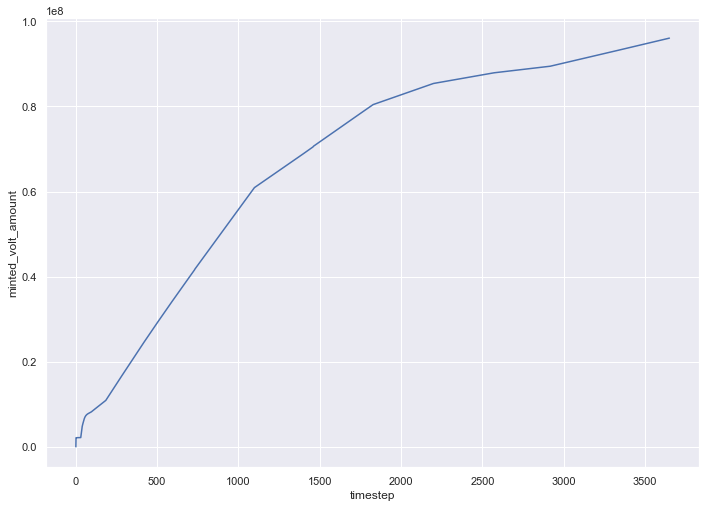

In [33]:
linear_plot(plot_df, 'minted_volt_amount', render='sns')

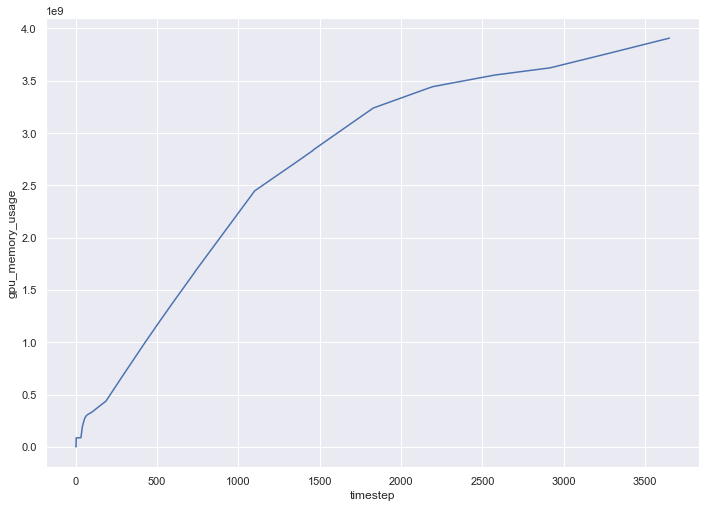

In [34]:
linear_plot(plot_df, 'gpu_memory_usage', render='sns')

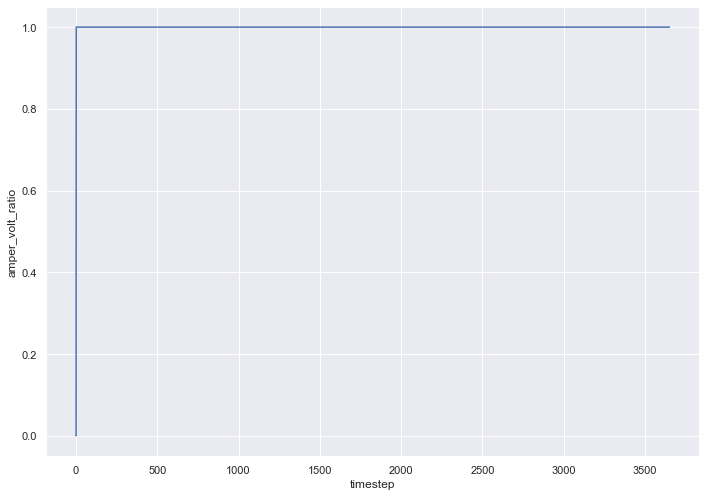

In [35]:
linear_plot(plot_df, 'amper_volt_ratio', render='sns')